<center><h1> Предобработка текста </h1></center>

### Зачем эта лекция?

Правильная предобработка текста позволяет добиться:
* улучшения получаемых результатов
* ускорения экспериментов (увеличения их количества) => п. 1
* воспроизводимости экспериментов
* удобной интерпретации и презентации результатов

### Методы обработки текста:
* Удаление мусорных символов
   <br> &nbsp; У меня все хорошо)))) $->$ У меня все хорошо)
* Приведение к нижнему регистру
   <br> &nbsp; Париж $->$ париж
* Токенизация
   <br> &nbsp; I'm &mdash; один токен или два?
* Нормализация (стемминг и лемматизация)
   <br> &nbsp; Красивый, красивое, красивая &mdash; разные токены
* Представление текста
   <br> &nbsp; BOW, TF-IDF
* Сокращение словаря
   <br> &nbsp; Удаление стоп-слов

<center><h1> Очистка </h1></center>

In [1]:
sent = 'Привет! Как дела? Пойдем в кино?'
print(sent.lower())

привет! как дела? пойдем в кино?


In [2]:
import re
sent = 'Привет11!1 Как дела?) Пойдем в кино?))))'
expr = r'[^А-Яа-я ]'
parser=re.compile(expr)
tmp_string = parser.sub(r'', sent)
print(tmp_string)

Привет Как дела Пойдем в кино


In [3]:
expr = r'[^А-Яа-я!?. ]'
parser=re.compile(expr)
tmp_string = parser.sub(r'', sent)
print(tmp_string)

Привет! Как дела? Пойдем в кино?


<center><h1> Уменьшение словаря </h1></center>

Плохие слова:
* Слишком частые
<br> &nbsp; русский язык: и, но, я, ты, ...
<br> &nbsp; английский язык: a, the, I, ...
<br> &nbsp; специфичные для коллекции: "сообщать" в новостях
* Слишком редкие
* Стоп-слова
<br> &nbsp; Предлоги, междометия, частицы, цифры

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/myavorskaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
list(sw_eng)[:6]

['didn', 'through', 'isn', 'i', 'below', 'further']

In [6]:
from nltk.corpus import stopwords
sw_ru = set(stopwords.words('russian'))
list(sw_ru)[:6]

['разве', 'более', 'какой', 'совсем', 'нет', 'как']

In [7]:
sent = 'Разница между прежним и теперешнем его состоянием состояла в том, \
        что прежде, когда он забывал то, что было перед ним, то, что ему \
        говорили, он, страдальчески сморщив лоб, как будто пытался и не мог\
        разглядеть чего-то, далеко отстоящего от него. Теперь он также \
        забывал то, что ему говорили, и то, что было перед ним; но теперь \
        с чуть заметной, как будто насмешливой, улыбкой он в то самое, \
        что было перед ним, вслушивался в то, что ему говорили, хотя \
        очевидно видел и слышал что-то совсем другое...\
        Теперь улыбка радости жизни постоянно играла у его рта, и в глазах \
        его светилось участие к людям - вопрос: довольны ли они так же, как он?'
clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])
print('До {} слов'.format(len(sent.split())))
print('После {} слов'.format(len(clean_sent.split())))
clean_sent

До 111 слов
После 60 слов


'Разница прежним теперешнем состоянием состояла том, прежде, забывал то, ним, то, говорили, он, страдальчески сморщив лоб, пытался мог разглядеть чего-то, далеко отстоящего него. Теперь также забывал то, говорили, то, ним; заметной, насмешливой, улыбкой самое, ним, вслушивался то, говорили, хотя очевидно видел слышал что-то другое... Теперь улыбка радости жизни постоянно играла рта, глазах светилось участие людям - вопрос: довольны же, он?'

In [8]:
sent = 'быть или не быть'
clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])

In [9]:
clean_sent

''

<center><h1> Токенизация </h1></center>
<center><h4> разделение на токены, элементарные единицы текста </h4></center>

In [10]:
light_string = 'Привет! Как дела? Пойдем в кино?'
print(light_string.split())

['Привет!', 'Как', 'дела?', 'Пойдем', 'в', 'кино?']


In [11]:
hard_string = 'Привет! Ты видел мр.Смита сегодня утром?'
print(hard_string.split())

['Привет!', 'Ты', 'видел', 'мр.Смита', 'сегодня', 'утром?']


In [12]:
import re

hard_string = 'Привет! Ты видел мр.Смита сегодня утром?'
expr = r'[^(\w.\w)\w\s]'
parser=re.compile(expr)
tmp_string = parser.sub(r'', hard_string)
print(tmp_string.split())

['Привет', 'Ты', 'видел', 'мр.Смита', 'сегодня', 'утром']


In [13]:
import re

hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
tmp_string = re.split(r'[!.?]', hard_string)
print(tmp_string)

['Привет', ' Ты видел мр', 'Смита сегодня утром', '']


In [14]:
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
exp = r'(?<!\w\.\w.)(?<![А-Я][а-я]\.)(?<=\.|\?)\s'
tmp_string = re.split(exp, hard_string)
print(tmp_string)

['Привет.', 'Ты видел мр.Смита сегодня утром?']


Больше примеров регулярных выражений: https://regex101.com/r/nG1gU7/27

<center><h1> Нормализация </h1></center>

#### Стемминг
<span style='color:blue'> СТЕММИНГ - нормализация слов путем отбрасывания окончаний (согласно правилам, основанным на грамматике языка)</span>

Стеммеры (nltk)
 - [Porter stemmer](http://tartarus.org/martin/PorterStemmer/)
 - [Snowball stemmer](http://snowball.tartarus.org/)
 - [Lancaster stemmer](http://www.nltk.org/_modules/nltk/stem/lancaster.html)
 - [MyStem](https://tech.yandex.ru/mystem/)

In [15]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'George admitted the talks happened'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

georg admit the talk happen


In [16]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'write wrote written'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

write wrote written


In [17]:
# Стемминг
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='russian')
sent = 'Опрошенные считают налоги необходимыми'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

опрошен счита налог необходим


In [18]:
sent = 'поле пол полка полк'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

пол пол полк полк


In [19]:
sent = 'крутой крутейший крутить'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

крут крут крут


#### Лемматизация
<span style='color:blue'> Лемматизация - приведение слов к начальной морфологической форме (с помощью словаря и грамматики языка)</span>

Лемматизаторы
- **pymorphy2** (язык русский, украинский)
- mystem3 (язык русский)
- **Wordnet Lemmatizer** (NLTK, язык английский, требует POS метку)
- Metaphraz (язык русский)
- Coda/Cadenza (языки русский и английский)

In [20]:
# Вспомогательная задача
from nltk import wordnet, pos_tag
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

In [21]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/myavorskaya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
sent = 'George admitted the talks happened'.split()
pos_tagged = pos_tag(sent)
print(pos_tagged)

[('George', 'NNP'), ('admitted', 'VBD'), ('the', 'DT'), ('talks', 'NNS'), ('happened', 'VBD')]


In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/myavorskaya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
print([get_wordnet_pos(tag) for word, tag in pos_tagged])

['n', 'v', 'n', 'n', 'v']


In [25]:
from nltk import WordNetLemmatizer
def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

In [26]:
sent = 'George admitted the talks happened'
print(my_lemmatizer(sent))

George admit the talk happen


In [27]:
sent = 'write wrote written'
print(my_lemmatizer(sent))

write write write


In [28]:
import pymorphy2
def my_lemmatizer_ru(sent):
    lemmatizer = pymorphy2.MorphAnalyzer()
    tokenized_sent = sent.split()
    return ' '.join([lemmatizer.parse(word)[0].normal_form
                    for word in tokenized_sent])

In [29]:
sent = 'Опрошенные считают налоги необходимыми'
print(my_lemmatizer_ru(sent))

опросить считать налог необходимый


In [30]:
sent = 'поле пол полка полк'
print(my_lemmatizer_ru(sent))

пол половина полка полк


In [31]:
sent = 'крутой крутейший крутить'
print(my_lemmatizer_ru(sent))

крутой крутый крутить


### Стемминг
* Плохо работает для русского языка
* Нормально работает для английского
* Повышает качество модели

### Лемматизация
* Лучше стемминга для русского языка
* Хорошо работает для английского языка
* Повышает качество модели
* Гораздо медленнее чем стемминг

<center><h1> Представление текста </h1></center>

<center>
<h3> One-hot encoding </h3>
</center>

Представление словаря в виде бинарных векторов, у которых все значения равны 0, кроме одного, отвечающего за соответствующее слово

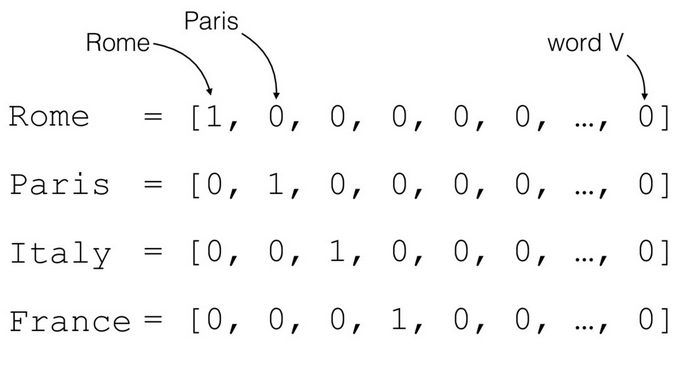

In [32]:
from IPython.display import Image
Image("one_hot_enc.png")

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
corpus = ['Rome', 'Paris', 'Rome', 'Italy', 'France']
label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(corpus)

onehot_encoder = OneHotEncoder(sparse=False)
corpus_encoded = corpus_encoded.reshape(len(corpus_encoded), 1)
corpus_onehot_encoded = onehot_encoder.fit_transform(corpus_encoded)
print(corpus_onehot_encoded)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


<center>
<h3> BOW </h3>
</center>

$D = {d_1, d_2, ... d_N}$ &mdash; обучающая коллекция документов
<br>
Каждый документ состоит из токенов из словаря $W$:
<br>
$d_i = (w_1, w_2, ..., w_{n_d})$, где $n_d$ &mdash; длина документа $d$
<br><br>
<b>Модель мешка слов (bag of words):</b>
<br>
Порядок слов в документе не важен, важно число вхождений каждого токена в документ
<br>
Кадый документ представляется вектором длины $|W|$: $v_d = [tf(w,d)]_{w \in W}$
<br><br>
$tf(w,d)$ &mdash; term frequency &mdash; сколько раз $w$ встретился в $d$
<br><br>
<center>
$tf(w,d) = \sum_{w' \in d}I[w = w'] = n_{wd}$
<br><br>
$tf(w,d) = I[w \in d]$
<br><br>
$tf(w,d) = \frac{n_{wd}}{n_{d}}$
<br><br>
$tf(w,d) = 1 + log(n_{wd})$
</center>

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [36]:
X.todense()

matrix([[0, 1, 1, 1, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 0, 2, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 1, 1, 0],
        [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

<center>
<h3> TF-IDF </h3>
</center>

$idf(w)$ &mdash; inverse document frequency &mdash; обратная документная частотность
<br>
<center>
$idf(w) = log(\frac{N}{\sum_{i=1}^N I[w \in d_i]})$
</center>
<br>
Кадый документ представляется вектором длины $|W|$: $v_d = [tf(w,d)*idf(w)]_{w \in W}$


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vectorizer = TfidfVectorizer()

In [38]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
Y = idf_vectorizer.fit_transform(corpus)
print(idf_vectorizer.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [39]:
Y.todense()

matrix([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674],
        [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
         0.85322574, 0.22262429, 0.        , 0.27230147],
        [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
         0.        , 0.28847675, 0.55280532, 0.        ],
        [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674]])

<center><h1>Метрики классификации</h1></center>

<center>
<table style="width:40%">
  <tr>
    <th></th>
    <th> y = 1 </th> 
    <th> y = 0 </th>
  </tr>
  <tr>
    <th> a(x) = 1 </th>
    <td> True positive </td> 
    <td> False positive </td>
  </tr>
  <tr>
    <th> a(x) = 0 </th>
    <td> False negative </td> 
    <td> True negative </td>
  </tr>
</table>
</center>

<center>
$Precision = \frac{TP}{TP + FP}$
<br><br>
$Recall = \frac{TP}{TP + FN}$
<br><br>
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
</center>
<br>
Интуиция:
* Precision &mdash; вероятность того, что любой выбранный случайным образом объект, для которого a(x) = 1, релевантный
* Recall &mdash; вероятность того, что для любого релевантного объекта выборки a(x) = 1

<center>
$F = 2 * \frac{Precision * Recall}{Precision + Recall}$
<br><br>
$F_{\beta} = (1 + \beta^2) * \frac{Precision * Recall}{\beta^2 * Precision + Recall}$
</center>

<center>
$TPR = \frac{TP}{P} = \frac{TP}{TP + FN}$
<br><br>
$FPR = \frac{TP}{N} = \frac{TP}{FP + TN}$
</center>

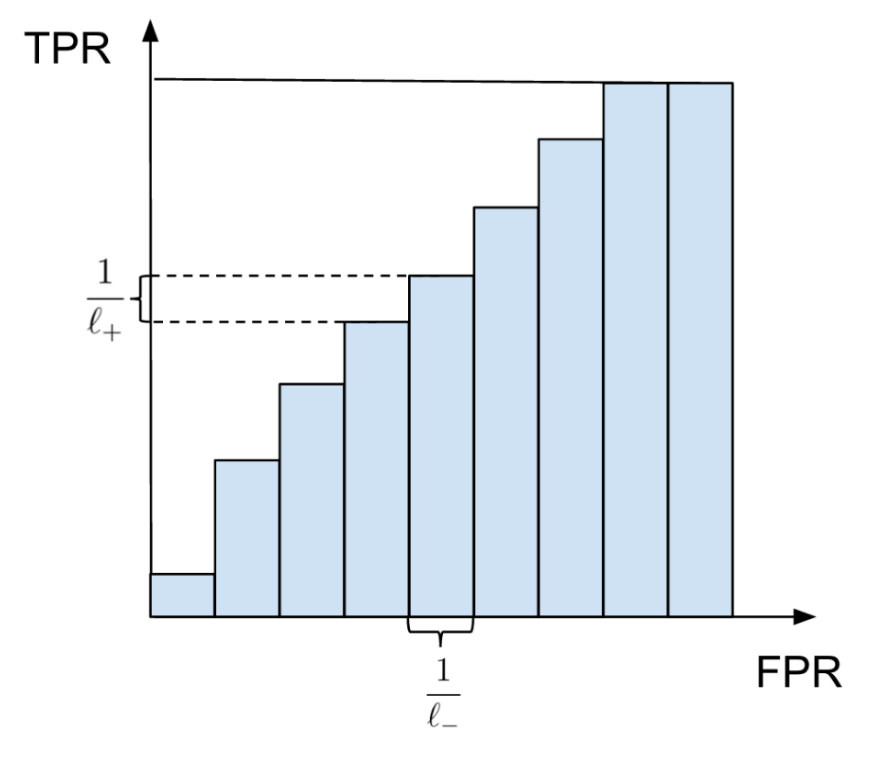

In [40]:
Image("auc_roc.png", height=1)

<center><h1>Классификация</h1></center>

In [41]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)

In [42]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [43]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [44]:
len(twenty_train.data)

2257

In [45]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [46]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2])

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [48]:
X_test_counts = count_vect.transform(twenty_test.data)
X_test_counts.shape

(1502, 35788)

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier()
svm.fit(X_train_counts, twenty_train.target)
predicted = svm.predict(X_test_counts)

In [51]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.81      0.80      0.81       319
         comp.graphics       0.84      0.95      0.89       389
               sci.med       0.94      0.77      0.85       396
soc.religion.christian       0.87      0.92      0.89       398

           avg / total       0.87      0.86      0.86      1502



In [52]:
import itertools
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)

Confusion matrix, without normalization


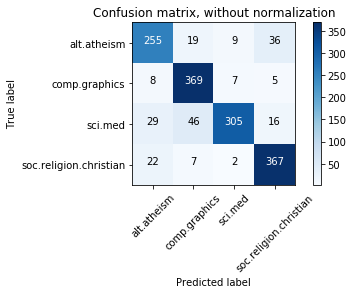

In [53]:
cnf_matrix = metrics.confusion_matrix(twenty_test.target, predicted)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=twenty_train.target_names,
                      title='Confusion matrix, without normalization')

plt.show()